## Metric: bedrock uncertainty (post-correction random error)

Test pair: 20180304-20180405

Bedrock offset distribution: CARST

![CARST-bedrock](./20180304-20180405_bedrock_vx-vs-vy.png)

#### If we calculate this for the GIV dataset:

In [10]:
import gftt
import matplotlib.pyplot as plt
import rasterio
import numpy as np

In [11]:
in_geotiff = '/home/jovyan/Projects/Github/Kaskacrack/data/GIV/Landsat_raw/20180304_20180405.tif'
in_shp = '/home/jovyan/Projects/Github/Kaskacrack/data/shapefiles/bedrock_V1.shp'

In [12]:
clipped_data = gftt.off_ice_errors(in_geotiff, in_shp)

In [13]:
ft_results = rasterio.open(in_geotiff)

This is GIV's output for the same pair `20180304_20180405`:

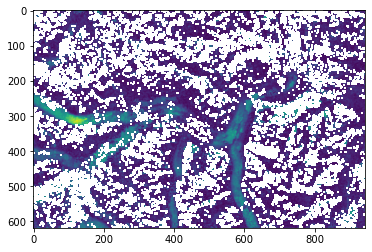

In [14]:
plt.imshow(ft_results.read(1))

#### Start to clip data over the bare rock:

In [15]:
# ft_results_carst = SingleRaster(in_geotiff)

In [16]:
# clipped_data = ft_results_carst.ClippedByPolygon(in_shp)

In [17]:
# Remove NaN values
clipped_data = clipped_data[clipped_data > -9998]

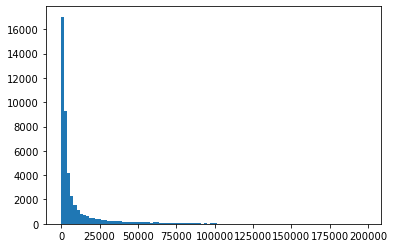

In [18]:
plt.hist(clipped_data ** 2, 100);

This shows the histogram of velocity $v = \sqrt{v_x^2 + v_y^2}$. Theoretically, $v^2 / \sigma^2$ follows a Chi-square distribution with a mean value of its degree of freedom, $k = 2$:

In [19]:
a = clipped_data ** 2

So, the mean value of $v^2$ divided by its degree of freedom should be the variance of the speed. 

In [20]:
np.mean(a) / 2    # sigma^2 
np.sqrt(np.mean(a) / 2) / 365.25 # sigma in m/d

0.18746484056237897

This gives as a random error on the bedrock of 0.19 m/day.

We can furthur remove the outliers from the velocity collection. For example:

In [21]:
furthur_clipped = a[a < np.mean(a) + 3 * np.std(a)]

In [22]:
print(np.std(furthur_clipped))
print(np.mean(furthur_clipped))
print(np.std(furthur_clipped) / np.mean(furthur_clipped))

11003.305471465323
7181.748827544525
1.5321206207134102


The ratio of the new standard distribution over the new mean is 1.53, which is close to its theoretical value ($\sqrt{2} \approx 1.414$). So maybe a reasonable cut. The new random error is:

In [23]:
np.sqrt(np.mean(furthur_clipped) / 2) / 365.25 # sigma in m/d

0.16406271100508452

In [ ]:
# ampoff = AmpcoroffFile('/home/whyj/Projects/Github/CARST/examples/featuretrack/Demo_Data/20180401-20180417_ampoff.p')
# ampoff.Load()
# ampoff.SetIni(ini)
# ampoff.FillwithNAN()
# ampoff.Ampcoroff2Velo(velo_or_pixel='pixel')

# shp = ini.velocorrection['bedrock']
# prefix = ini.rawoutput['label_geotiff']
# velo = RasterVelos(vx=SingleRaster(prefix + '_vx.tif'),
#                    vy=SingleRaster(prefix + '_vy.tif'),
#                    snr=SingleRaster(prefix + '_snr.tif'),
#                    mag=SingleRaster(prefix + '_mag.tif'),
#                    errx=SingleRaster(prefix + '_errx.tif'),
#                    erry=SingleRaster(prefix + '_erry.tif'))

# idx = points_in_polygon(ampoff.data[:, [0,2]], shp)

# # SNR constraint
# snr_threshold = ampoff.snr[:, 2] >= ini.noiseremoval['snr']
# idx = np.logical_and(idx, snr_threshold)


# vxraw_bdval = ZArray(ampoff.velo_x[idx, 2])
# vyraw_bdval = ZArray(ampoff.velo_y[idx, 2])
# vxyraw_bdval = DuoZArray(z1=vxraw_bdval, z2=vyraw_bdval, ini=ini)
# vxyraw_bdval.OutlierDetection2D(thres_sigma=ini.velocorrection['refvelo_outlier_sigma'])
# vxyraw_bdval.HistWithOutliers(which='x')
# vxyraw_bdval.HistWithOutliers(which='y')

In [1]:
# import logging
# mpl_logger = logging.getLogger('matplotlib')
# mpl_logger.setLevel(logging.WARNING)
# from carst import SingleRaster, RasterVelos, ConfParams
# from carst.libft import ampcor_task, writeout_ampcor_task
# from carst.libxyz import ZArray, DuoZArray, AmpcoroffFile, points_in_polygon